## Artificial Neural Networks in Regression analysis

### ANN 3. Using Household and Transportation Costs (% of income) and group-level ethnicity to Predict Accessibility

In [26]:
from __future__ import absolute_import, division, print_function

import pathlib
import pickle
import seaborn as sns


import pandas as pd
import numpy as np
#pd.options.display.max_rows = 10

#import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
%matplotlib inline
pd.options.display.max_rows = 10

1.12.0


In [2]:
Data_clean_all_col = pd.read_csv('Spatial_weights_all.csv', delimiter = ',', encoding='latin-1', converters={'GEOID10': lambda x: str(x), 'BlockId': lambda x: int(x), 'BlockgroupId': lambda x: int(x), 'TractId': lambda x: int(x)}
)
Data_clean_all_col['GEOID10']=Data_clean_all_col['GEOID10'].apply(lambda x: '{0:0>15}'.format(x))
Data_clean_all_col.head()

,Unnamed: 0,X,OBJECTID_1,GEOID10,CTCB10,BG10,X_CENTER,Y_CENTER,COMMNAME,CB10,...,Fourth_qui,Top_5_perc,perc_below,perc_bel_1,Less_high_,High_schoo,Black_Afri,Hispanic,White_Alon,populati_1
0,1,1,48354,060371011101000,1011101000,1011101,6475454.31,1917493.83,Los Angeles - Tujunga,1000,...,98321.0,166923.0,1075.0,8.0,3137.0,670.0,1.138852,37.122208,73.893999,4566
1,2,2,31442,060371011101007,1011101007,1011101,6474224.94,1916298.68,Los Angeles - Tujunga,1007,...,98321.0,166923.0,1075.0,8.0,3137.0,670.0,1.138852,37.122208,73.893999,4566
2,3,3,35619,060371011101008,1011101008,1011101,6474718.45,1916291.85,Los Angeles - Tujunga,1008,...,98321.0,166923.0,1075.0,8.0,3137.0,670.0,1.138852,37.122208,73.893999,4566
3,4,4,89321,060371011101011,1011101011,1011101,6475268.08,1916284.43,Los Angeles - Tujunga,1011,...,98321.0,166923.0,1075.0,8.0,3137.0,670.0,1.138852,37.122208,73.893999,4566
4,5,5,84366,060371011102004,1011102004,1011102,6472361.62,1916319.86,Los Angeles - Tujunga,2004,...,98321.0,166923.0,1075.0,8.0,3137.0,670.0,1.138852,37.122208,73.893999,4566


In [3]:
Lag_pred_for_merge = pd.read_csv('Lag_pred_for_merge.csv', delimiter = ',',converters={'GEOID10': lambda x: str(x), 'BlockId': lambda x: int(x), 'BlockgroupId': lambda x: int(x), 'TractId': lambda x: int(x)}
)
Lag_pred_for_merge['GEOID10']=Lag_pred_for_merge['GEOID10'].apply(lambda x: '{0:0>15}'.format(x))
Lag_pred_for_merge.head()

,Unnamed: 0,GEOID10,populati_1,yb,lag_ht_ami,lag_Lowest_Qui,lag_Hispanic,lag_Black_Afri,lag_White_Alon,lag_Less_high_,...,Fit_1_Tot_r_10,Fit_2_Tot_r_10,Fit_3_Tot_r_10,Fit_4_Tot_r_10,Fit_5_Tot_r_10,Fit_6_Tot_r_10,ANN_1_Tot_r_10,ANN_2_Tot_r_10,ANN_3_Tot_r_10,ANN_4_Tot_r_10
0,1,060371011101000,4566,1 High,47.0,14394.0,52.738706,2.846268,77.858679,4027.0,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
1,2,060371011101007,4566,1 High,47.0,14394.0,52.738706,2.846268,77.858679,4027.0,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
2,3,060371011101008,4566,1 High,47.0,14394.0,52.738706,2.846268,77.858679,4027.0,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
3,4,060371011101011,4566,1 High,47.0,14394.0,52.738706,2.846268,77.858679,4027.0,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
4,5,060371011102004,4566,1 High,47.0,14394.0,52.738706,2.846268,77.858679,4027.0,...,30264.86623,-3581.635544,-37870.046870,-528.113892,-219.208947,1476.780679,93797.41,104498.48,83827.266,88984.016


In [4]:
All_data = Data_clean_all_col.merge(Lag_pred_for_merge,
                                    on='GEOID10')
All_data.head()

,Unnamed: 0_x,X,OBJECTID_1,GEOID10,CTCB10,BG10,X_CENTER,Y_CENTER,COMMNAME,CB10,...,Fit_1_Tot_r_10,Fit_2_Tot_r_10,Fit_3_Tot_r_10,Fit_4_Tot_r_10,Fit_5_Tot_r_10,Fit_6_Tot_r_10,ANN_1_Tot_r_10,ANN_2_Tot_r_10,ANN_3_Tot_r_10,ANN_4_Tot_r_10
0,1,1,48354,060371011101000,1011101000,1011101,6475454.31,1917493.83,Los Angeles - Tujunga,1000,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
1,2,2,31442,060371011101007,1011101007,1011101,6474224.94,1916298.68,Los Angeles - Tujunga,1007,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
2,3,3,35619,060371011101008,1011101008,1011101,6474718.45,1916291.85,Los Angeles - Tujunga,1008,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
3,4,4,89321,060371011101011,1011101011,1011101,6475268.08,1916284.43,Los Angeles - Tujunga,1011,...,14996.78569,853.474224,5687.844585,-14641.369980,-784.432774,-882.625161,89468.05,96512.68,77364.130,80264.734
4,5,5,84366,060371011102004,1011102004,1011102,6472361.62,1916319.86,Los Angeles - Tujunga,2004,...,30264.86623,-3581.635544,-37870.046870,-528.113892,-219.208947,1476.780679,93797.41,104498.48,83827.266,88984.016


In [5]:
Sample_Data_clean = All_data[['Tot_r_10', 'ht_ami', 'Black_Afri', 'Hispanic']]
Sample_Data_clean

,Tot_r_10,ht_ami,Black_Afri,Hispanic
0,9407.8979,60.0,1.138852,37.122208
1,10492.4500,60.0,1.138852,37.122208
2,10283.7200,60.0,1.138852,37.122208
3,10238.5000,60.0,1.138852,37.122208
4,11543.9900,57.0,1.138852,37.122208
...,...,...,...,...
16465,92774.4534,52.0,17.173318,35.340729
16466,91699.3770,52.0,17.173318,35.340729
16467,91699.3770,52.0,17.173318,35.340729
16468,89253.7904,52.0,17.173318,35.340729


In [6]:
train_dataset = Sample_Data_clean.sample(frac=0.8,random_state=0)
test_dataset = Sample_Data_clean.drop(train_dataset.index)
test_dataset

,Tot_r_10,ht_ami,Black_Afri,Hispanic
0,9407.8979,60.000000,1.138852,37.122208
13,13052.2800,47.000000,1.586826,30.508982
21,20115.7300,75.000000,2.613769,9.288215
25,12751.4857,55.000000,0.464661,22.841771
26,11355.1029,55.000000,0.464661,22.841771
...,...,...,...,...
16443,90761.0929,44.000000,17.173318,35.340729
16447,91382.7025,44.000000,17.173318,35.340729
16456,94307.4831,60.586042,17.173318,35.340729
16463,84007.9313,52.000000,17.173318,35.340729


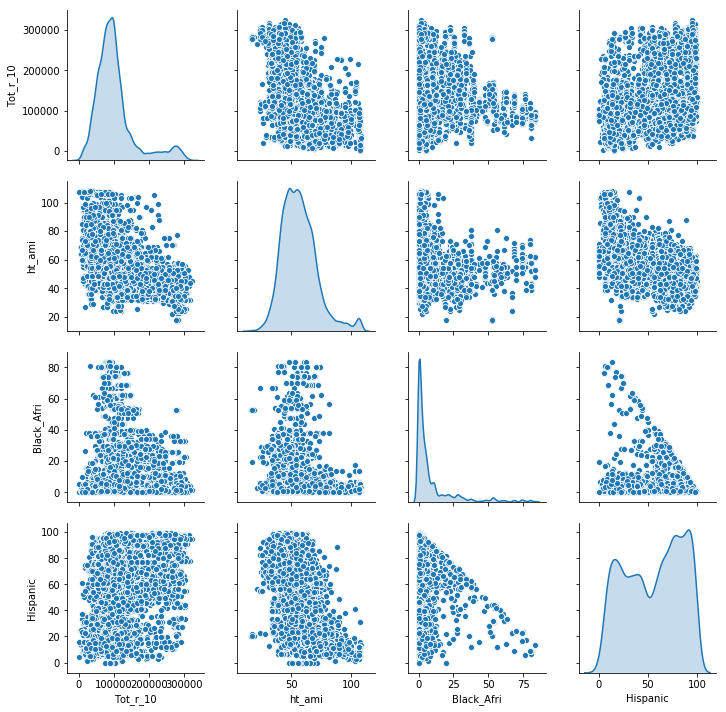

In [7]:
sns.pairplot(train_dataset[['Tot_r_10', 'ht_ami', 'Black_Afri', 'Hispanic']], diag_kind="kde")


In [8]:
train_stats = train_dataset.describe()
train_stats.pop("Tot_r_10")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ht_ami,13176.0,56.879521,14.405075,17.000000,47.000000,55.000000,65.000000,108.000000
Black_Afri,13176.0,9.003125,14.922817,0.000000,0.721877,3.052432,9.569267,83.455952
Hispanic,13176.0,56.047390,28.869662,-0.401694,30.219007,60.168447,81.881131,99.624329


In [9]:
train_labels = train_dataset.pop('Tot_r_10')
test_labels = test_dataset.pop('Tot_r_10')

In [10]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [11]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [14]:
Dense = tf.keras.layers.Dense

In [15]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [16]:
model = build_model()

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [18]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.16637424],
       [-0.22067228],
       [ 0.03338751],
       [ 0.02219911],
       [-0.08299594],
       [-0.13454862],
       [-0.11551137],
       [ 0.0646484 ],
       [ 0.01017886],
       [-0.38297218]], dtype=float32)

In [19]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.to_csv('hist_ANN3.csv', sep=',')
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,2.049975e+09,32459.954408,2.049975e+09,1.963425e+09,31526.223435,1.963425e+09,995
996,2.047114e+09,32357.065947,2.047114e+09,1.963141e+09,31505.734603,1.963141e+09,996
997,2.048532e+09,32372.658458,2.048532e+09,1.963196e+09,31520.540420,1.963196e+09,997
998,2.046062e+09,32332.690277,2.046062e+09,1.963076e+09,31500.517365,1.963076e+09,998
999,2.053465e+09,32576.719503,2.053465e+09,1.962759e+09,31458.448985,1.962759e+09,999


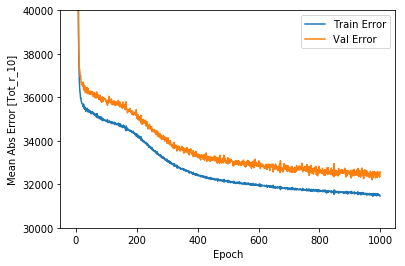

In [22]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Tot_r_10]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([30000,40000])
    plt.savefig("ANN3.png", format="PNG")

plot_history(history)

In [23]:
model.save('./ANN_3.model')

In [13]:
model_from_save = tf.keras.models.load_model('./ANN_3/ANN_3.model')

In [14]:
full_normed_data = norm(All_data[['ht_ami', 'Black_Afri', 'Hispanic']]).values

In [15]:
prediction = model_from_save.predict(full_normed_data)

In [16]:
prediction.mean()

104015.61

# Comparing MLM and ANN

In [20]:
prediction_MLM = pd.read_csv('./Fit_4/Pred_4_trans.csv')
prediction_MLM.head()

,Unnamed: 0,21999
0,y_hat[1],14641.369980
1,y_hat[2],14641.369980
2,y_hat[3],14641.369980
3,y_hat[4],14641.369980
4,y_hat[5],528.113892


In [21]:
prediction_ANN = pd.read_csv('./ANN_3/prediction_ANN_3.csv')
prediction_ANN.head()

,Unnamed: 0,predictions
0,0,77364.130
1,1,77364.130
2,2,77364.130
3,3,77364.130
4,4,83827.266


In [22]:
y_pred_ANN = prediction_ANN['predictions']
y_pred_MLM = prediction_MLM['21999']
y_true = All_data['Tot_r_10']

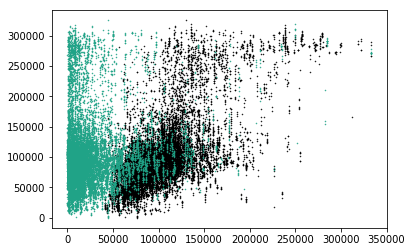

In [23]:
plt.scatter(y_pred_ANN, y_true,color='k', marker='.', s=1)
plt.scatter(y_pred_MLM, y_true,color='#20A387', marker='.', s=1)

plt.show()

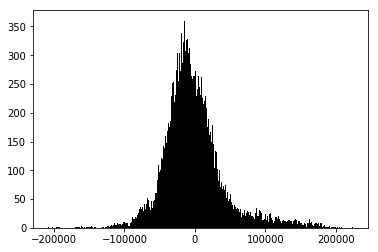

In [28]:
plt.hist(All_data.Tot_r_10 - prediction.flatten(), bins=300, color='k')
plt.savefig("ANN3_hist.png", format="PNG")

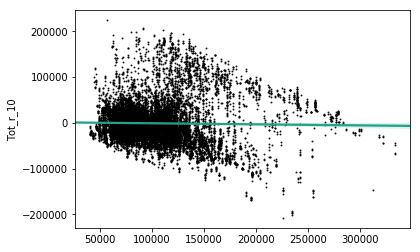

In [29]:
sns.regplot(prediction, 
            All_data.Tot_r_10 - prediction.flatten(),
            scatter_kws=dict(color='k', marker='.', s=1), 
            line_kws=dict(color='#20A387'))
plt.savefig("ANN3_scatter.png", format="PNG")

In [18]:
def r2(pred, obs):
    ess = (pred - obs).T @ (pred - obs)
    tss = obs.var() * obs.shape[0]
    return 1- ess/tss

In [24]:
import sklearn 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred_ANN)

31794.470880704313

In [27]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred_ANN): 
    y_true, y_pred_ANN = check_array(y_true, y_pred_ANN)
return np.mean(np.abs((y_true - y_pred_ANN) / y_true)) * 100


43.62072781801269

In [31]:
import numpy

In [19]:
r2(prediction, All_data[['Tot_r_10']])

,Tot_r_10
Tot_r_10,0.393913


In [33]:
prediction = pd.DataFrame(prediction, columns=['predictions']).to_csv('prediction_ANN_3.csv')